In [10]:
!pip install mplfinance
!pip install bokeh

In [24]:
import math
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates
import mplfinance as fplt

from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import RobustScaler
from datetime import date, timedelta, datetime
from pandas.plotting import register_matplotlib_converters
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [25]:
import matplotlib
matplotlib.use('nbagg')
sns.set(rc={'figure.figsize':(15, 5)})

LẤY DỮ LIỆU GIÁ BTC THEO GIÁ USDT

In [33]:
df = pd.read_csv("C:/Users/Public/Downloads/BTCUSDT_1h.csv")
df

,open,high,low,close,volume,close_time,quote,takers_buy_base,takers_buy_quote
0,4261.48,4313.62,4261.32,4308.83,47.181009,2017-08-16 23:59:59.999000-05:00,2.023661e+05,35.160503,1.509525e+05
1,4308.83,4328.69,4291.37,4315.32,23.234916,2017-08-17 00:59:59.999000-05:00,1.003048e+05,21.448071,9.260828e+04
2,4330.29,4345.45,4309.37,4324.35,7.229691,2017-08-17 01:59:59.999000-05:00,3.128231e+04,4.802861,2.079532e+04
3,4316.62,4349.99,4287.41,4349.99,4.443249,2017-08-17 02:59:59.999000-05:00,1.924106e+04,2.602292,1.129135e+04
4,4333.32,4377.85,4333.32,4360.69,0.972807,2017-08-17 03:59:59.999000-05:00,4.239504e+03,0.814655,3.552747e+03
...,...,...,...,...,...,...,...,...,...
38456,41184.44,41723.87,41118.36,41604.58,1816.054560,2022-01-10 13:59:59.999000-05:00,7.523858e+07,968.387390,4.012530e+07
38457,41604.58,41698.07,41205.65,41297.15,1358.541170,2022-01-10 14:59:59.999000-05:00,5.637205e+07,690.382540,2.864461e+07
38458,41297.15,41779.46,41158.99,41714.72,1245.440490,2022-01-10 15:59:59.999000-05:00,5.161796e+07,642.619620,2.663620e+07
38459,41716.81,41985.00,41562.38,41714.13,1365.382650,2022-01-10 16:59:59.999000-05:00,5.703537e+07,724.557670,3.026707e+07


PRE - PROCESSING

In [34]:
df.isna().sum()

open                0
high                0
low                 0
close               0
volume              0
close_time          0
quote               0
takers_buy_base     0
takers_buy_quote    0
dtype: int64

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38461 entries, 0 to 38460
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   open              38461 non-null  float64
 1   high              38461 non-null  float64
 2   low               38461 non-null  float64
 3   close             38461 non-null  float64
 4   volume            38461 non-null  float64
 5   close_time        38461 non-null  object 
 6   quote             38461 non-null  float64
 7   takers_buy_base   38461 non-null  float64
 8   takers_buy_quote  38461 non-null  float64
dtypes: float64(8), object(1)
memory usage: 2.6+ MB


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38461 entries, 0 to 38460
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   open              38461 non-null  float64
 1   high              38461 non-null  float64
 2   low               38461 non-null  float64
 3   close             38461 non-null  float64
 4   volume            38461 non-null  float64
 5   close_time        38461 non-null  object 
 6   quote             38461 non-null  float64
 7   takers_buy_base   38461 non-null  float64
 8   takers_buy_quote  38461 non-null  float64
dtypes: float64(8), object(1)
memory usage: 2.6+ MB


In [37]:
df.describe()

,open,high,low,close,volume,quote,takers_buy_base,takers_buy_quote
count,38461.000000,38461.000000,38461.000000,38461.000000,38461.000000,3.846100e+04,38461.000000,3.846100e+04
mean,17589.002805,17696.560219,17473.314191,17589.962025,2101.814189,4.369855e+07,1046.701701,2.159233e+07
std,17359.685254,17463.372583,17249.006318,17359.989729,2175.337360,7.080532e+07,1066.267302,3.481741e+07
min,2870.900000,2950.000000,2817.000000,2919.000000,0.000000,0.000000e+00,0.000000,0.000000e+00
25%,6726.000000,6752.760000,6695.490000,6726.110000,919.149470,7.125238e+06,470.170524,3.665090e+06
50%,9298.330000,9339.370000,9259.980000,9298.750000,1536.182670,1.545427e+07,773.216614,7.739254e+06
75%,19024.330000,19125.760000,18900.000000,19026.490000,2571.497519,5.187811e+07,1279.230445,2.529690e+07
max,68635.120000,69000.000000,68451.190000,68633.690000,47255.762690,1.514465e+09,20628.794050,6.849674e+08


In [38]:
df["close_time"].min(), df["close_time"].max()

('2017-08-16 23:59:59.999000-05:00', '2022-01-10 17:59:59.999000-05:00')

In [39]:
# Removing the localization in 'close_time'
df['close_time'] = pd.to_datetime(df['close_time'], errors='coerce')
df['close_time'] = df['close_time'].dt.tz_localize(None)
df

,open,high,low,close,volume,close_time,quote,takers_buy_base,takers_buy_quote
0,4261.48,4313.62,4261.32,4308.83,47.181009,2017-08-16 23:59:59.999,2.023661e+05,35.160503,1.509525e+05
1,4308.83,4328.69,4291.37,4315.32,23.234916,2017-08-17 00:59:59.999,1.003048e+05,21.448071,9.260828e+04
2,4330.29,4345.45,4309.37,4324.35,7.229691,2017-08-17 01:59:59.999,3.128231e+04,4.802861,2.079532e+04
3,4316.62,4349.99,4287.41,4349.99,4.443249,2017-08-17 02:59:59.999,1.924106e+04,2.602292,1.129135e+04
4,4333.32,4377.85,4333.32,4360.69,0.972807,2017-08-17 03:59:59.999,4.239504e+03,0.814655,3.552747e+03
...,...,...,...,...,...,...,...,...,...
38456,41184.44,41723.87,41118.36,41604.58,1816.054560,2022-01-10 13:59:59.999,7.523858e+07,968.387390,4.012530e+07
38457,41604.58,41698.07,41205.65,41297.15,1358.541170,2022-01-10 14:59:59.999,5.637205e+07,690.382540,2.864461e+07
38458,41297.15,41779.46,41158.99,41714.72,1245.440490,2022-01-10 15:59:59.999,5.161796e+07,642.619620,2.663620e+07
38459,41716.81,41985.00,41562.38,41714.13,1365.382650,2022-01-10 16:59:59.999,5.703537e+07,724.557670,3.026707e+07


In [40]:
# close_time to Index --> For visualization
df_plot = df.copy()
df_plot = df_plot.set_index('close_time')
df_plot

,open,high,low,close,volume,quote,takers_buy_base,takers_buy_quote
close_time,,,,,,,,
2017-08-16 23:59:59.999,4261.48,4313.62,4261.32,4308.83,47.181009,2.023661e+05,35.160503,1.509525e+05
2017-08-17 00:59:59.999,4308.83,4328.69,4291.37,4315.32,23.234916,1.003048e+05,21.448071,9.260828e+04
2017-08-17 01:59:59.999,4330.29,4345.45,4309.37,4324.35,7.229691,3.128231e+04,4.802861,2.079532e+04
2017-08-17 02:59:59.999,4316.62,4349.99,4287.41,4349.99,4.443249,1.924106e+04,2.602292,1.129135e+04
2017-08-17 03:59:59.999,4333.32,4377.85,4333.32,4360.69,0.972807,4.239504e+03,0.814655,3.552747e+03
...,...,...,...,...,...,...,...,...
2022-01-10 13:59:59.999,41184.44,41723.87,41118.36,41604.58,1816.054560,7.523858e+07,968.387390,4.012530e+07
2022-01-10 14:59:59.999,41604.58,41698.07,41205.65,41297.15,1358.541170,5.637205e+07,690.382540,2.864461e+07
2022-01-10 15:59:59.999,41297.15,41779.46,41158.99,41714.72,1245.440490,5.161796e+07,642.619620,2.663620e+07


1. Sử dụng mplfinance để phân tích dữ liệu dưới dạng chân nến (phần nào) 
2. Lưu ý rằng sẽ mất một chút thời gian để kết xuất vì có quá nhiều bản ghi 
3. Bỏ qua cảnh báo

C:\Users\Admin\anaconda3\lib\site-packages\mplfinance\_arg_validators.py:83: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


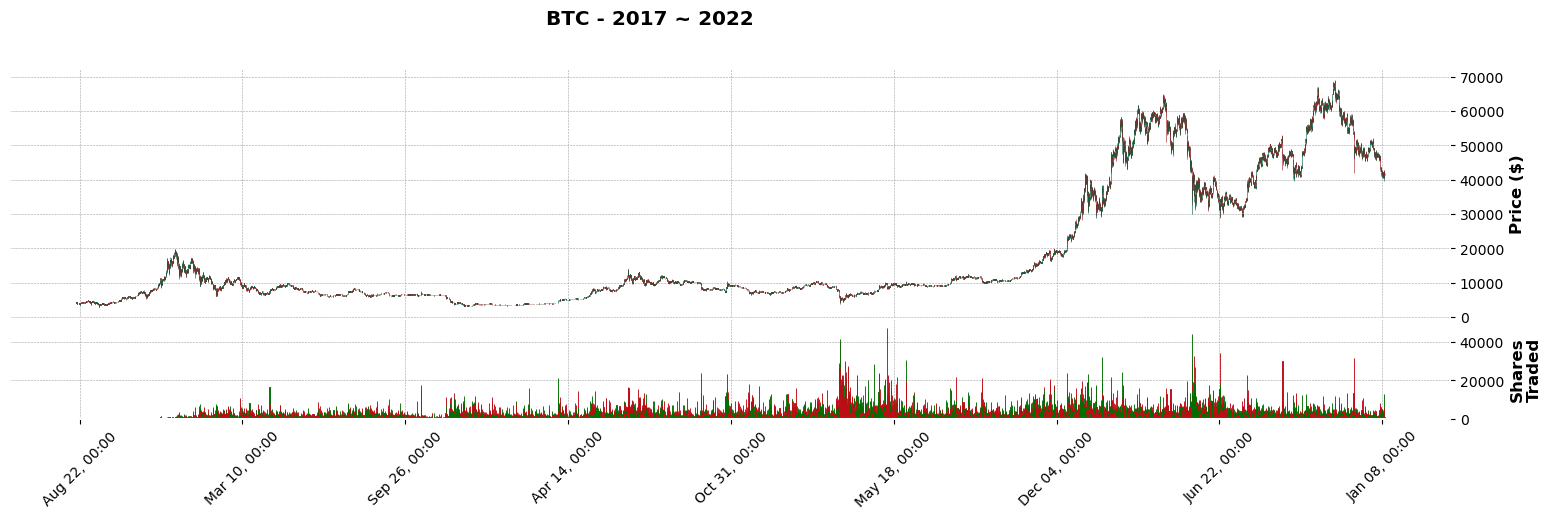

In [50]:
# Using mplfinance to cisualizes the data as candlesticks (somewhat)
# Note that it will take some time to render, since there are too many records
# Ignore the warning

%matplotlib widget
%matplotlib inline

fplt.plot(
    df_plot,
    figsize=(20,5) ,
    type='candle',
    style='charles',
    title='BTC - 2017 ~ 2022',
    ylabel='Price ($)',
    volume=True,
    ylabel_lower='Shares\nTraded',
    show_nontrading=True)

PHÂN TÍCH KỸ THUẬT

In [74]:
def createFeatures(df):
    df = pd.DataFrame(df)
        
    # Moving averages - different periods
    df['MA200'] = df['close'].rolling(window=200).mean() 
    df['MA100'] = df['close'].rolling(window=100).mean() 
    df['MA50'] = df['close'].rolling(window=50).mean() 
    df['MA26'] = df['close'].rolling(window=26).mean()            
    df['MA20'] = df['close'].rolling(window=20).mean() 
    df['MA12'] = df['close'].rolling(window=12).mean() 
    
    # SMA Differences - different periods
    df['DIFF-MA200-MA50'] = df['MA200'] - df['MA50']
    df['DIFF-MA200-MA100'] = df['MA200'] - df['MA100']
    df['DIFF-MA200-CLOSE'] = df['MA200'] - df['close']            
    df['DIFF-MA100-CLOSE'] = df['MA100'] - df['close']
    df['DIFF-MA50-CLOSE'] = df['MA50'] - df['close']
    
    # Moving Averages on high, lows, and std - different periods
    df['MA200_low'] = df['low'].rolling(window=200).min()
    df['MA14_low'] = df['low'].rolling(window=14).min()
    df['MA200_high'] = df['high'].rolling(window=200).max()       
    df['MA14_high'] = df['high'].rolling(window=14).max()
    df['MA20dSTD'] = df['close'].rolling(window=20).std() 
    
    # Exponential Moving Averages (EMAS) - different periods
    df['EMA12'] = df['close'].ewm(span=12, adjust=False).mean()
    df['EMA20'] = df['close'].ewm(span=20, adjust=False).mean()
    df['EMA26'] = df['close'].ewm(span=26, adjust=False).mean()   
    df['EMA100'] = df['close'].ewm(span=100, adjust=False).mean()
    df['EMA200'] = df['close'].ewm(span=200, adjust=False).mean()

    # Shifts (one day before and two days before)
    df['close_shift-1'] = df.shift(-1)['close']
    df['close_shift-2'] = df.shift(-2)['close']                   

    # Bollinger Bands
    df['Bollinger_Upper'] = df['MA20'] + (df['MA20dSTD'] * 2)    
    df['Bollinger_Lower'] = df['MA20'] - (df['MA20dSTD'] * 2)     
    
    
    df['K-ratio'] = 100*((df['close'] - df['MA14_low']) / (df['MA14_high'] - df['MA14_low']) )
    
    # Relative Strength Index (RSI)
    df['RSI'] = df['K-ratio'].rolling(window=3).mean()            
 
    # Moving Average Convergence/Divergence (MACD)
    df['MACD'] = df['EMA12'] - df['EMA26']                        
    
    # Replace NA's
    nareplace = df.at[df.index.max(), 'close']                     
    df.fillna((nareplace), inplace=True)
    
    return df

In [75]:
# List of considered Features

FEATURES = [
#             'High',
#             'Low',
#             'Open',
              'close',
#             'Volume',
              'close_time',
#             'Day',
#             'Month',
#             'Year',
#             'Adj Close',
#             'close_shift-1',
#             'close_shift-2',
              'MACD',
              'RSI',
#             'MA200',
#             'MA200_high',
#             'MA200_low',
              'Bollinger_Upper',                                      
              'Bollinger_Lower',
#             'MA100',            
#             'MA50',
#             'MA26',
#             'MA14_low',
#             'MA14_high',
#             'MA12',
#             'EMA20',
#             'EMA100',
#             'EMA200',
#             'DIFF-MA200-MA50',
#             'DIFF-MA200-MA10',
#             'DIFF-MA200-CLOSE',
#             'DIFF-MA100-CLOSE',
#             'DIFF-MA50-CLOSE'
           ]

PHÂN TÍCH NGẮN HẠN

          close              close_time        MACD        RSI  Bollinger_Upper  Bollinger_Lower  Prediction
38456  41604.58 2022-01-10 13:59:59.999 -158.819324  73.847793     42513.870776     40740.301224    41604.58
38457  41297.15 2022-01-10 14:59:59.999 -159.054664  66.896607     42489.799789     40707.625211    41297.15
38458  41714.72 2022-01-10 15:59:59.999 -124.116031  74.750016     42493.968139     40709.410861    41714.72
38459  41714.13 2022-01-10 16:59:59.999  -95.375097  77.342898     42484.946973     40708.313027    41714.13
38460  41616.08 2022-01-10 17:59:59.999  -79.592027  81.890131     42455.741484     40706.355516    41616.08


<function matplotlib.pyplot.show(close=None, block=None)>

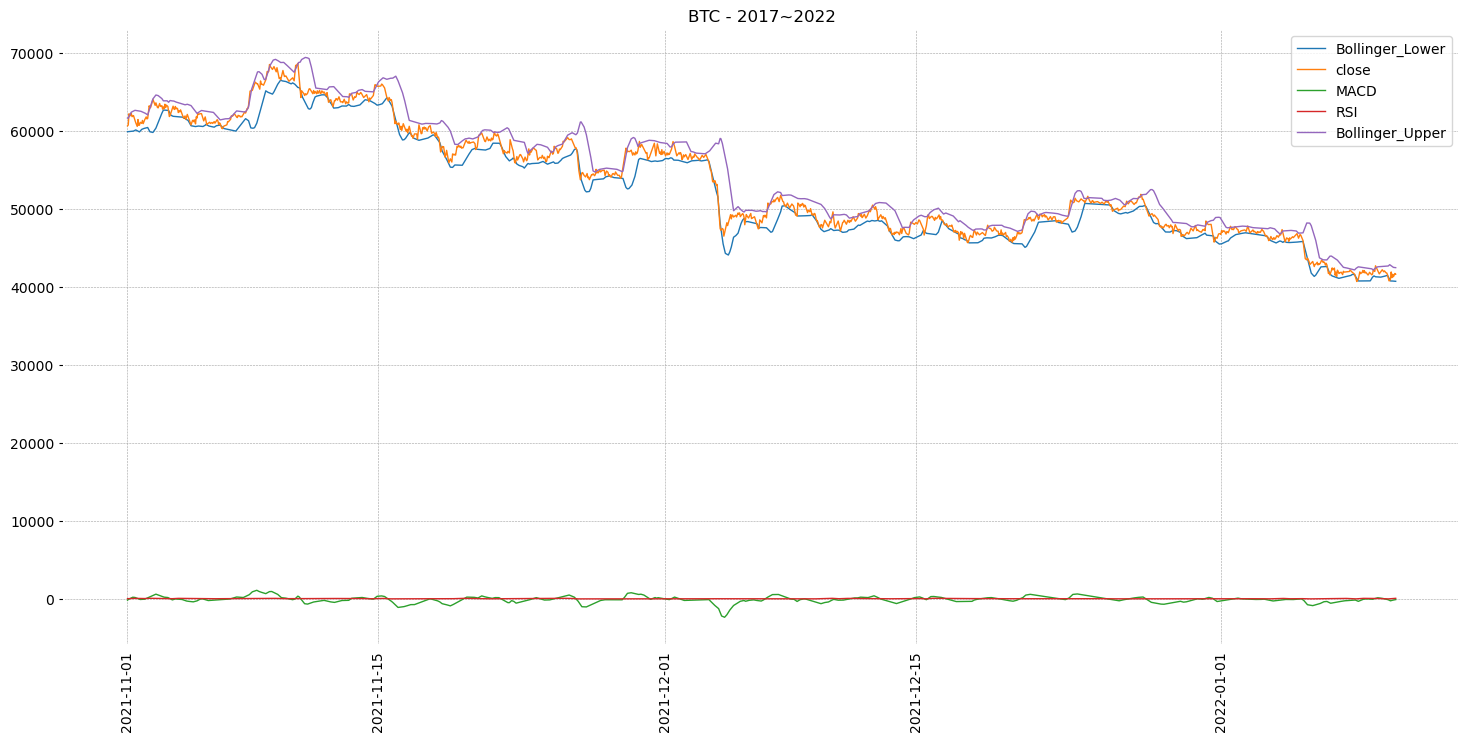

In [73]:
# Dataset with features
data = createFeatures(df)                               

# Enter YOUR date
# Since if we use the entire dataset, it won't be plotted properly, I will use tha data from past 2 months
# Feel free to change the 'use_start_date'
use_start_date = pd.to_datetime("2021-11-01" )

# Shift the timeframe
data = data[data['close_time'] > use_start_date].copy()             

# Filter the data to the list of FEATURES
data_filtered = data[FEATURES]                                

# We add a prediction column and set dummy values to prepare the data for scaling
data_filtered_ext = data_filtered.copy()
data_filtered_ext['Prediction'] = data_filtered_ext['close']  
print(data_filtered_ext.tail().to_string())

# remove Date column before training 
dfs = data_filtered_ext.copy()
del dfs[('close_time')]                                             
del dfs[('Prediction')]

# Register matplotlib converters
register_matplotlib_converters()

nrows = dfs.shape[1]

# Plot parameters
fig, ax = plt.subplots(figsize=(18, 8))                       
x = data_filtered_ext['close_time'] 
assetname_list = []

for i in range(nrows):
    assetname = dfs.columns[i-1]
    y = data_filtered_ext[assetname]
    
    # Plotting each column
    ax.plot(x, y, label=assetname, linewidth=1.0)             
    assetname_list.append(assetname)

  
ax.set_title('BTC - 2017~2022')
ax.legend()
ax.tick_params(axis="x", rotation=90, labelsize=10, length=0)   
plt.show

RNN (LSTM)

Thu nhỏ & Chuyển đổi dữ liệu

In [77]:
df_lstm = df.copy()
del df_lstm[('close_time')]

nrows = df_lstm.shape[0]
np_data_unscaled = np.reshape(np.array(df_lstm), (nrows, -1))
print(np_data_unscaled.shape)

scaler = RobustScaler()
np_data = scaler.fit_transform(np_data_unscaled)

scaler_pred = RobustScaler()
df_Close = pd.DataFrame(df_lstm['close'])
np_Close_scaled = scaler_pred.fit_transform(df_Close)
(38461, 36)

(38461, 36)


(38461, 36)

In [127]:
sequence_length = 50

# 80-20 split for training and test sets -- feel free to change this
train_data_length = math.ceil(np_Close_scaled.shape[0] * 0.8)

# Create the training and test data
train_data = np_Close_scaled[0:train_data_length, :]
test_data = np_Close_scaled[train_data_length - sequence_length:, :]

def partition_dataset(sequence_length, data):
    x, y = [], []
    data_len = data.shape[0]

    for i in range(sequence_length, data_len):
        x.append(data[i-sequence_length:i,:]) 
        y.append(data[i, 0]) 
    
    x = np.array(x)
    y = np.array(y)
    return x, y

x_train, y_train = partition_dataset(sequence_length, train_data)
x_test, y_test = partition_dataset(sequence_length, test_data)


print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

print(x_train[1][sequence_length-1][0])
print(y_train[0])
(30719, 50, 1), (30719,)
(7692, 50, 1), (7692,)
-0.43184682099252214
-0.43184682099252214

(30719, 50, 1) (30719,)
(7692, 50, 1) (7692,)
-0.43184682099252214
-0.43184682099252214


-0.43184682099252214

MODEL TRANING

In [71]:
model = Sequential()

n_neurons = x_train.shape[1] * x_train.shape[2]
print('timesteps: ' + str(x_train.shape[1]) + ',' + ' features: ' + str(x_train.shape[2]) + ', neurons: ' + str(n_neurons))

# The Model
model.add(LSTM(64, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2]))) 

model.add(LSTM(128, return_sequences=True))

model.add(LSTM(64, return_sequences=False))

model.add(Dense(32))
model.add(Dense(1, activation='relu'))
 
# Hyperparameters
optimizer='adam'; loss='mean_squared_error'; epochs = 100; batch_size = 64; patience = 6;
parameter_list = ['epochs ' + str(epochs), 'batch_size ' + str(batch_size), 'patience ' + str(patience), 'optimizer ' + str(optimizer), 'loss ' + str(loss)]
print('Parameters: ' + str(parameter_list))

model.compile(optimizer=optimizer, loss=loss)

early_stop = EarlyStopping(monitor='loss', 
                           patience=patience, 
                           verbose=1)

model.summary()

timesteps: 50, features: 1, neurons: 50
Parameters: ['epochs 100', 'batch_size 64', 'patience 6', 'optimizer adam', 'loss mean_squared_error']
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 50, 64)            16896     
                                                                 
 lstm_7 (LSTM)               (None, 50, 128)           98816     
                                                                 
 lstm_8 (LSTM)               (None, 64)                49408     
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 167,233
Trainable params: 167

In [66]:
history = model.fit(x_train,
                    y_train,
                    validation_data=(x_test, y_test),
                    batch_size=batch_size, 
                    epochs=epochs, 
                    callbacks=[early_stop], 
                    shuffle = True)

Epoch 1/100
480/480 [==============================] - 110s 210ms/step - loss: 0.0474 - val_loss: 0.3204
Epoch 2/100
480/480 [==============================] - 96s 200ms/step - loss: 0.0450 - val_loss: 0.0058
Epoch 3/100
480/480 [==============================] - 99s 207ms/step - loss: 0.0449 - val_loss: 0.0142
Epoch 4/100
480/480 [==============================] - 108s 224ms/step - loss: 0.0445 - val_loss: 0.0046
Epoch 5/100
480/480 [==============================] - 102s 213ms/step - loss: 0.0446 - val_loss: 0.0049
Epoch 6/100
480/480 [==============================] - 106s 220ms/step - loss: 0.0444 - val_loss: 0.0063
Epoch 7/100
480/480 [==============================] - 108s 226ms/step - loss: 0.0444 - val_loss: 0.0019
Epoch 8/100
480/480 [==============================] - 96s 200ms/step - loss: 0.0443 - val_loss: 0.0067
Epoch 9/100
480/480 [==============================] - 96s 200ms/step - loss: 0.0443 - val_loss: 0.0036
Epoch 10/100
480/480 [==============================] - 98s

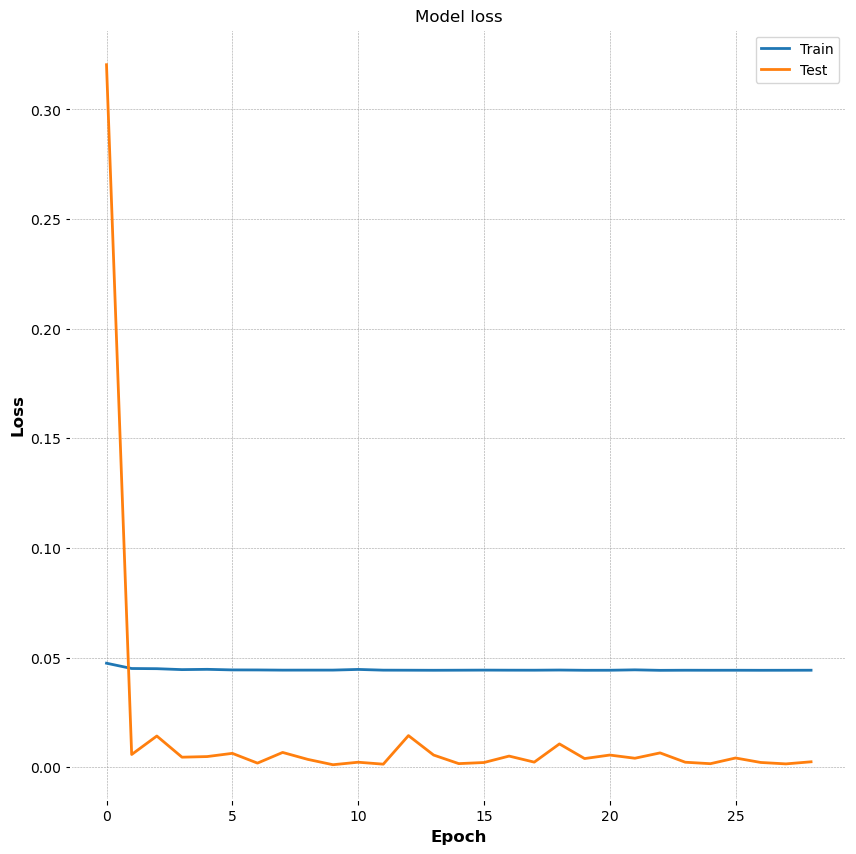

In [78]:
fig, ax = plt.subplots(figsize=(10, 10), sharex=True)

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

plt.title("Model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Test"], loc="upper right")
plt.show()

In [79]:
train_df = df_plot.sort_values(by=['close_time']).copy()    
date_index = train_df.index                       
date_index_df = pd.DataFrame(date_index)

DỰ ĐOÁN

Thay đổi ngày giống như trước đây, ta chọn 2021-11-01 - 2022-01-10

241/241 [==============================] - 14s 48ms/step
Median Absolute Error (MAE): 39327.97
Mean Absolute Percentage Error (MAPE): 80.08 %
Median Absolute Percentage Error (MDAPE): 80.86 %


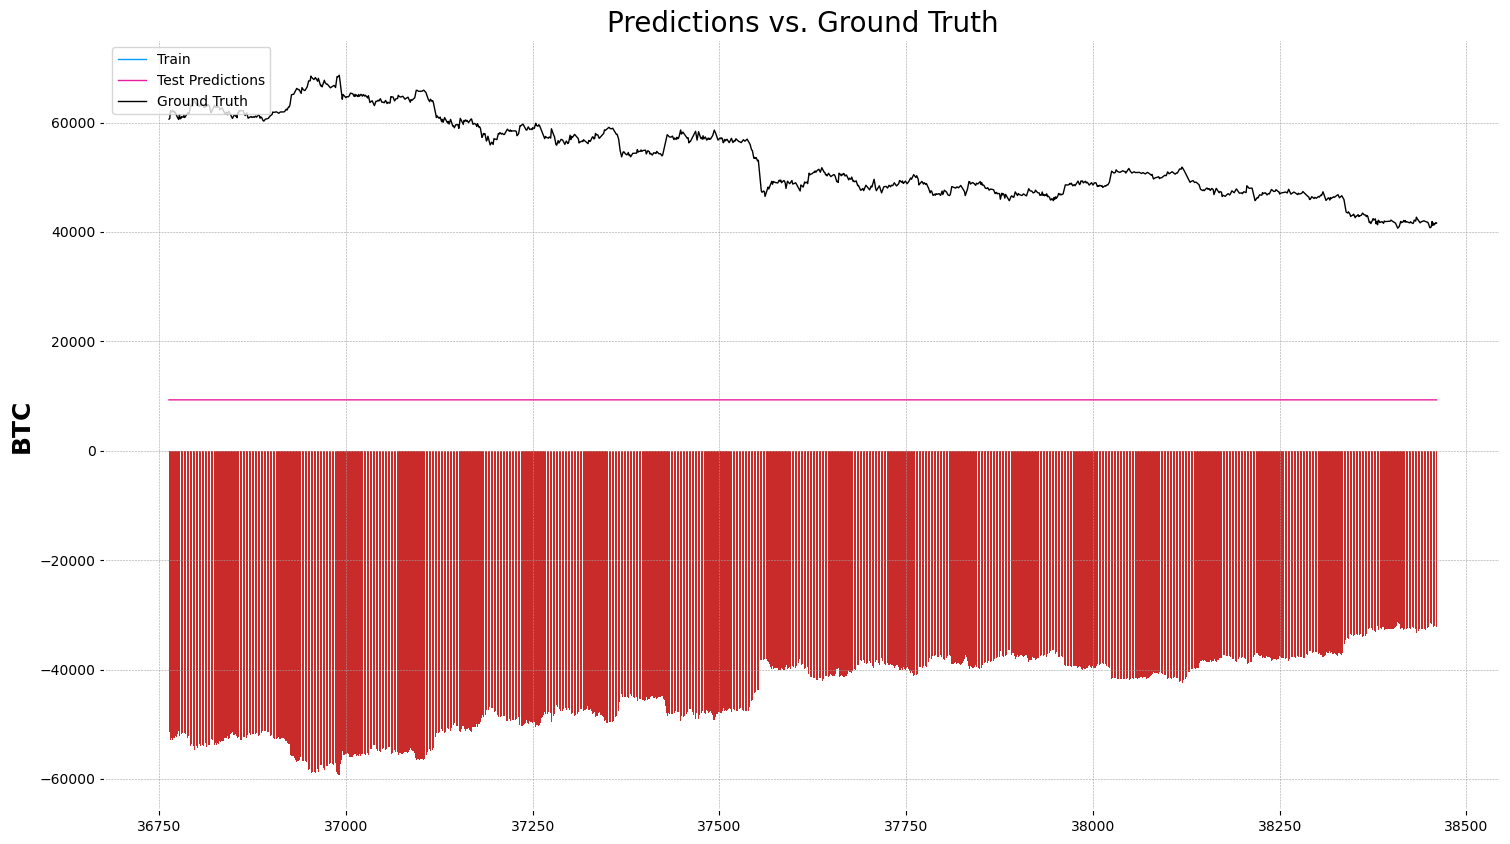

In [80]:
y_pred_scaled = model.predict(x_test)

# Unscale the predicted values
y_pred = scaler_pred.inverse_transform(y_pred_scaled)
y_test_unscaled = scaler_pred.inverse_transform(y_test.reshape(-1, 1))
y_test_unscaled.shape

MAE = mean_absolute_error(y_test_unscaled, y_pred)
print(f'Median Absolute Error (MAE): {np.round(MAE, 2)}')

MAPE = np.mean((np.abs(np.subtract(y_test_unscaled, y_pred)/ y_test_unscaled))) * 100
print(f'Mean Absolute Percentage Error (MAPE): {np.round(MAPE, 2)} %')

MDAPE = np.median((np.abs(np.subtract(y_test_unscaled, y_pred)/ y_test_unscaled)) ) * 100
print(f'Median Absolute Percentage Error (MDAPE): {np.round(MDAPE, 2)} %')

# Again, change the date if you want
display_start_date = "2021-11-01" 
use_start_date = pd.to_datetime("2021-11-01" )

data_filtered_sub = df_lstm.copy()
date_index = date_index_df[date_index_df['close_time'] > use_start_date].copy()
data_filtered_sub['close_time'] = date_index

train = data_filtered_sub[:train_data_length + 1]
valid = data_filtered_sub[train_data_length:]
valid.insert(1, "Predictions", y_pred, True)
valid.insert(1, "Difference", valid["Predictions"] - valid["close"], True)


valid = valid[valid['close_time'] > display_start_date]
train = train[train['close_time'] > display_start_date]

fig, ax = plt.subplots(figsize=(18, 10), sharex=True)

plt.title("Predictions vs. Ground Truth", fontsize=20)
plt.ylabel('BTC', fontsize=18)
plt.plot(train["close"], color="#039dfc", linewidth=1.0)
plt.plot(valid["Predictions"], color="#E91D9E", linewidth=1.0)
plt.plot(valid["close"], color="black", linewidth=1.0)
plt.legend(["Train", "Test Predictions", "Ground Truth"], loc="upper left")

valid.loc[valid["Difference"] >= 0, 'diff_color'] = "#2BC97A"
valid.loc[valid["Difference"] < 0, 'diff_color'] = "#C92B2B"
plt.bar(valid.index, valid["Difference"], width=0.8, color=valid['diff_color'])

plt.show()

DỰ ĐOÁN XU HƯỚNG GIAO DỊCH (TĂNG CƯỜNG TỐC ĐỘ)

Thời điểm này, khung dữ liệu chính (df*) có các tính năng từ phân tích kỹ thuật. 

Ở đây, ta tạo một phiên bản mới của tập dữ liệu

In [82]:
df_t = pd.read_csv("C:/Users/Public/Downloads/BTCUSDT_1h.csv")

# Removing the localization in 'close_time'
df_t['close_time'] = pd.to_datetime(df_t['close_time'], errors='coerce')
df_t['close_time'] = df_t['close_time'].dt.tz_localize(None)
df_t

,open,high,low,close,volume,close_time,quote,takers_buy_base,takers_buy_quote
0,4261.48,4313.62,4261.32,4308.83,47.181009,2017-08-16 23:59:59.999,2.023661e+05,35.160503,1.509525e+05
1,4308.83,4328.69,4291.37,4315.32,23.234916,2017-08-17 00:59:59.999,1.003048e+05,21.448071,9.260828e+04
2,4330.29,4345.45,4309.37,4324.35,7.229691,2017-08-17 01:59:59.999,3.128231e+04,4.802861,2.079532e+04
3,4316.62,4349.99,4287.41,4349.99,4.443249,2017-08-17 02:59:59.999,1.924106e+04,2.602292,1.129135e+04
4,4333.32,4377.85,4333.32,4360.69,0.972807,2017-08-17 03:59:59.999,4.239504e+03,0.814655,3.552747e+03
...,...,...,...,...,...,...,...,...,...
38456,41184.44,41723.87,41118.36,41604.58,1816.054560,2022-01-10 13:59:59.999,7.523858e+07,968.387390,4.012530e+07
38457,41604.58,41698.07,41205.65,41297.15,1358.541170,2022-01-10 14:59:59.999,5.637205e+07,690.382540,2.864461e+07
38458,41297.15,41779.46,41158.99,41714.72,1245.440490,2022-01-10 15:59:59.999,5.161796e+07,642.619620,2.663620e+07
38459,41716.81,41985.00,41562.38,41714.13,1365.382650,2022-01-10 16:59:59.999,5.703537e+07,724.557670,3.026707e+07


<AxesSubplot:xlabel='close_time'>

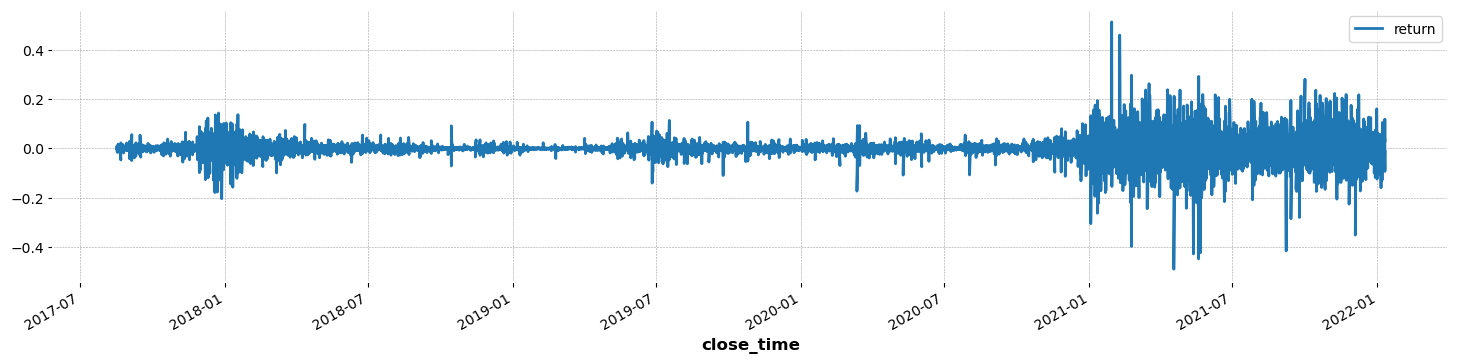

In [83]:
# Normalize 'close' value --> Target

df_t['return'] = df_t['close'] - df_t['close'].shift(1)
return_range = df_t['return'].max() - df_t['return'].min() 
df_t['return'] = df_t['return'] / return_range

df_t.plot(x='close_time', y='return', figsize=(18,4))

In [84]:
# Make label, 1 as rising price, 0 as falling price

df_t['label'] = df_t['return'].shift(-1)
df_t['label'] = df_t['label'].apply(lambda x: 1 if x>0.0 else 0)
df_t.tail()

,open,high,low,close,volume,close_time,quote,takers_buy_base,takers_buy_quote,return,label
38456,41184.44,41723.87,41118.36,41604.58,1816.05456,2022-01-10 13:59:59.999,75238582.20,968.38739,40125297.46,0.054115,0
38457,41604.58,41698.07,41205.65,41297.15,1358.54117,2022-01-10 14:59:59.999,56372049.31,690.38254,28644607.64,-0.039599,1
38458,41297.15,41779.46,41158.99,41714.72,1245.44049,2022-01-10 15:59:59.999,51617961.98,642.61962,26636196.01,0.053785,0
38459,41716.81,41985.00,41562.38,41714.13,1365.38265,2022-01-10 16:59:59.999,57035367.63,724.55767,30267070.67,-0.000076,0
38460,41714.14,41849.45,41500.00,41616.08,720.49192,2022-01-10 17:59:59.999,30028452.44,332.23313,13846666.79,-0.012629,0


In [85]:
df1 = df_t[df_t['label'] == 1]
df2 = df_t[df_t['label'] == 0]

print('df1 ',df1.shape)
print('df2 ',df2.shape)

df1  (19688, 11)
df2  (18773, 11)


In [86]:
df1 =df1.sample(n=18773)
df1

,open,high,low,close,volume,close_time,quote,takers_buy_base,takers_buy_quote,return,label
20317,7098.82,7122.05,7093.99,7114.01,937.112166,2019-12-15 12:59:59.999,6.660404e+06,500.644264,3.558426e+06,0.001994,1
286,4349.55,4359.99,4314.35,4314.78,17.146541,2017-08-28 21:59:59.999,7.433207e+04,1.488773,6.479737e+03,-0.004477,1
2079,6060.66,6074.28,5900.00,5949.99,261.909667,2017-11-11 21:59:59.999,1.573034e+06,114.597548,6.883893e+05,-0.014814,1
26796,10220.77,10264.00,10200.00,10223.57,2277.330601,2020-09-10 23:59:59.999,2.330405e+07,1135.745566,1.162327e+07,0.000362,1
1857,6981.07,7132.00,6965.00,7028.04,76.368343,2017-11-02 15:59:59.999,5.383966e+05,27.885964,1.972216e+05,0.005943,1
...,...,...,...,...,...,...,...,...,...,...,...
14072,4096.82,4096.83,4082.00,4083.01,837.945053,2019-03-29 09:59:59.999,3.426551e+06,466.959515,1.909837e+06,-0.001779,1
21375,8998.69,9039.84,8976.46,9010.86,1245.255641,2020-01-28 14:59:59.999,1.122278e+07,684.259394,6.168569e+06,0.001575,1
25465,9152.08,9155.00,9128.00,9149.87,1217.840397,2020-07-17 12:59:59.999,1.113747e+07,550.524103,5.034546e+06,-0.000286,1
8504,6303.40,6322.38,6235.42,6261.42,1501.175308,2018-08-08 17:59:59.999,9.425072e+06,784.310455,4.926151e+06,-0.005407,1


In [87]:
df_merge = pd.concat([df1, df2])
df_merge

,open,high,low,close,volume,close_time,quote,takers_buy_base,takers_buy_quote,return,label
20317,7098.82,7122.05,7093.99,7114.01,937.112166,2019-12-15 12:59:59.999,6.660404e+06,500.644264,3.558426e+06,0.001994,1
286,4349.55,4359.99,4314.35,4314.78,17.146541,2017-08-28 21:59:59.999,7.433207e+04,1.488773,6.479737e+03,-0.004477,1
2079,6060.66,6074.28,5900.00,5949.99,261.909667,2017-11-11 21:59:59.999,1.573034e+06,114.597548,6.883893e+05,-0.014814,1
26796,10220.77,10264.00,10200.00,10223.57,2277.330601,2020-09-10 23:59:59.999,2.330405e+07,1135.745566,1.162327e+07,0.000362,1
1857,6981.07,7132.00,6965.00,7028.04,76.368343,2017-11-02 15:59:59.999,5.383966e+05,27.885964,1.972216e+05,0.005943,1
...,...,...,...,...,...,...,...,...,...,...,...
38454,40984.34,41985.99,40850.03,41904.40,4663.471580,2022-01-10 11:59:59.999,1.939588e+08,2639.707960,1.097589e+08,0.118510,0
38456,41184.44,41723.87,41118.36,41604.58,1816.054560,2022-01-10 13:59:59.999,7.523858e+07,968.387390,4.012530e+07,0.054115,0
38458,41297.15,41779.46,41158.99,41714.72,1245.440490,2022-01-10 15:59:59.999,5.161796e+07,642.619620,2.663620e+07,0.053785,0
38459,41716.81,41985.00,41562.38,41714.13,1365.382650,2022-01-10 16:59:59.999,5.703537e+07,724.557670,3.026707e+07,-0.000076,0


In [88]:
df_merge = df_merge.sort_values("close_time")
df_merge

,open,high,low,close,volume,close_time,quote,takers_buy_base,takers_buy_quote,return,label
0,4261.48,4313.62,4261.32,4308.83,47.181009,2017-08-16 23:59:59.999,2.023661e+05,35.160503,1.509525e+05,NaN,1
1,4308.83,4328.69,4291.37,4315.32,23.234916,2017-08-17 00:59:59.999,1.003048e+05,21.448071,9.260828e+04,0.000836,1
2,4330.29,4345.45,4309.37,4324.35,7.229691,2017-08-17 01:59:59.999,3.128231e+04,4.802861,2.079532e+04,0.001163,1
3,4316.62,4349.99,4287.41,4349.99,4.443249,2017-08-17 02:59:59.999,1.924106e+04,2.602292,1.129135e+04,0.003303,1
4,4333.32,4377.85,4333.32,4360.69,0.972807,2017-08-17 03:59:59.999,4.239504e+03,0.814655,3.552747e+03,0.001378,1
...,...,...,...,...,...,...,...,...,...,...,...
38456,41184.44,41723.87,41118.36,41604.58,1816.054560,2022-01-10 13:59:59.999,7.523858e+07,968.387390,4.012530e+07,0.054115,0
38457,41604.58,41698.07,41205.65,41297.15,1358.541170,2022-01-10 14:59:59.999,5.637205e+07,690.382540,2.864461e+07,-0.039599,1
38458,41297.15,41779.46,41158.99,41714.72,1245.440490,2022-01-10 15:59:59.999,5.161796e+07,642.619620,2.663620e+07,0.053785,0
38459,41716.81,41985.00,41562.38,41714.13,1365.382650,2022-01-10 16:59:59.999,5.703537e+07,724.557670,3.026707e+07,-0.000076,0


In [89]:
df_merge.isna().sum()

open                0
high                0
low                 0
close               0
volume              0
close_time          0
quote               0
takers_buy_base     0
takers_buy_quote    0
return              1
label               0
dtype: int64

In [90]:
df_merge.drop(index=df_merge.index[0], axis=0,inplace=True)

In [91]:
df_merge.isna().sum()

open                0
high                0
low                 0
close               0
volume              0
close_time          0
quote               0
takers_buy_base     0
takers_buy_quote    0
return              0
label               0
dtype: int64

In [92]:
df_merge

,open,high,low,close,volume,close_time,quote,takers_buy_base,takers_buy_quote,return,label
1,4308.83,4328.69,4291.37,4315.32,23.234916,2017-08-17 00:59:59.999,1.003048e+05,21.448071,9.260828e+04,0.000836,1
2,4330.29,4345.45,4309.37,4324.35,7.229691,2017-08-17 01:59:59.999,3.128231e+04,4.802861,2.079532e+04,0.001163,1
3,4316.62,4349.99,4287.41,4349.99,4.443249,2017-08-17 02:59:59.999,1.924106e+04,2.602292,1.129135e+04,0.003303,1
4,4333.32,4377.85,4333.32,4360.69,0.972807,2017-08-17 03:59:59.999,4.239504e+03,0.814655,3.552747e+03,0.001378,1
5,4360.00,4445.78,4360.00,4444.00,10.763623,2017-08-17 04:59:59.999,4.721936e+04,10.258400,4.499538e+04,0.010731,1
...,...,...,...,...,...,...,...,...,...,...,...
38456,41184.44,41723.87,41118.36,41604.58,1816.054560,2022-01-10 13:59:59.999,7.523858e+07,968.387390,4.012530e+07,0.054115,0
38457,41604.58,41698.07,41205.65,41297.15,1358.541170,2022-01-10 14:59:59.999,5.637205e+07,690.382540,2.864461e+07,-0.039599,1
38458,41297.15,41779.46,41158.99,41714.72,1245.440490,2022-01-10 15:59:59.999,5.161796e+07,642.619620,2.663620e+07,0.053785,0
38459,41716.81,41985.00,41562.38,41714.13,1365.382650,2022-01-10 16:59:59.999,5.703537e+07,724.557670,3.026707e+07,-0.000076,0


In [108]:
# Make training dataset
# This cell will take some time to execute, because of vertical stacking

# Number of features --> taking last 60 days for each tree
n_features = 60 

# Empty array of size 60
train_x = np.array([]).reshape([-1,n_features]) 
train_y = np.array([]).reshape([-1,1])
for index, row in df_merge.iterrows():
    i = df_merge.index.get_loc(index)  #index
    if i<n_features:
        continue
    _x = np.array(df_t[i-n_features+1:i+1]['return']).T.reshape([1, -1]) 
    _y = df_t.loc[i]['label']
    train_x = np.vstack((train_x, _x))
    train_y = np.vstack((train_y, _y))
    
train_y = train_y.reshape([-1])

print(train_x.shape)
print(train_y.shape)

print('%% of Class_0 : %f' % (np.count_nonzero(train_y == 0)/float(len(train_y))))
print('%% of Class_1 : %f' % (np.count_nonzero(train_y == 1)/float(len(train_y))))

(37485, 60)
(37485,)
% of Class_0 : 0.487502
% of Class_1 : 0.512498


In [109]:
# 90% for training, 10% for testing

from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(random_state=0, n_estimators=4)

train_len = int(len(train_x)*0.9)
clf.fit(train_x[:train_len], train_y[:train_len])

accuracy = clf.score(train_x[train_len:], train_y[train_len:])
print('Testing Accuracy: %f' % accuracy)

Testing Accuracy: 0.527874


In [110]:
train_x[train_len:] = np.nan_to_num(train_x[train_len:])
np.any(np.isnan(train_x[train_len:]))

False

,return,label,pred,won,pnl,equity
3743,-624.12,0.0,1.0,False,-624.12,51011.78
3744,-263.76,0.0,1.0,False,-263.76,50748.02
3745,-975.32,0.0,1.0,False,-975.32,49772.70
3746,-17.69,0.0,1.0,False,-17.69,49755.01
3747,-100.69,0.0,1.0,False,-100.69,49654.32


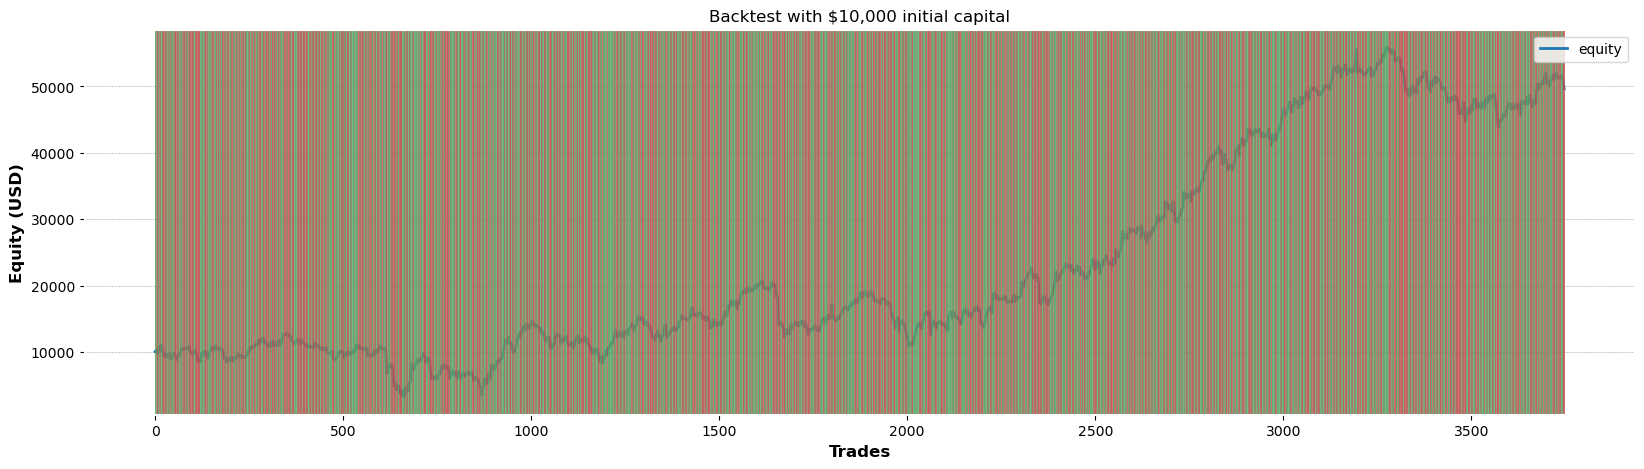

In [112]:
# Predict test data
pred = clf.predict(train_x[train_len:])


# Calculate equity
contracts  = 10000.0
commission = 0.0
flag = 0

df_trade = pd.DataFrame(train_x[train_len:,-1], columns=['return'])
df_trade['label']  = train_y[train_len:]
df_trade['pred']   = pred
df_trade['won']    = df_trade['label'] == df_trade['pred']
df_trade['return'] = df_trade['return'].shift(-1) * return_range
df_trade.drop(df_trade.index[len(df_trade)-1], inplace=True)

def calc_profit(row):
    global flag
    if flag == 0:
        eq = contracts
        flag = 1
    else:
        eq = 0 
        
    if row['won']:
        return abs(row['return']) + eq - commission
    else:
        return -abs(row['return']) + eq - commission

df_trade['pnl'] = df_trade.apply(lambda row: calc_profit(row), axis=1)
df_trade['equity'] = df_trade['pnl'].cumsum()

display(df_trade.tail())
df_trade.plot(y='equity', figsize=(20,5), title='Backtest with $10,000 initial capital')
plt.xlabel('Trades')
plt.ylabel('Equity (USD)')
for r in df_trade.iterrows():
    if r[1]['won']:
        plt.axvline(x=r[0], linewidth=0.5, alpha=0.8, color='g')
    else:
        plt.axvline(x=r[0], linewidth=0.5, alpha=0.8, color='r')

In [113]:
# The first 20 trades

df_trade.head(20)

,return,label,pred,won,pnl,equity
0,41.46,1.0,1.0,True,10041.46,10041.46
1,107.23,1.0,1.0,True,107.23,10148.69
2,109.98,1.0,0.0,False,-109.98,10038.71
3,-211.76,0.0,0.0,True,211.76,10250.47
4,96.39,1.0,1.0,True,96.39,10346.86
5,-135.79,0.0,1.0,False,-135.79,10211.07
6,-405.39,0.0,1.0,False,-405.39,9805.68
7,-76.38,0.0,1.0,False,-76.38,9729.30
8,590.29,1.0,1.0,True,590.29,10319.59
9,114.64,1.0,1.0,True,114.64,10434.23


Net Profit            : $49654.32
Number Winning Trades : 1979
Number Losing Trades  : 1768
Percent Profitable    : 52.82%
Avg Win Trade         : $232.010
Avg Los Trade         : $-231.614
Largest Win Trade     : $10041.460
Largest Los Trade     : $-3216.440
Profit Factor         : 1.12


<AxesSubplot:>

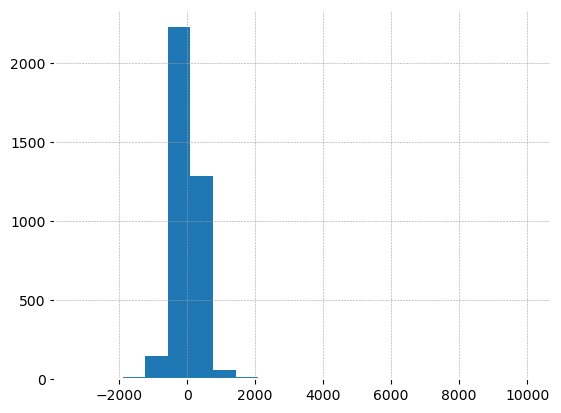

In [114]:
# Calculate summary of trades

n_win_trades = float(df_trade[df_trade['pnl']>0.0]['pnl'].count())
n_los_trades = float(df_trade[df_trade['pnl']<0.0]['pnl'].count())
print("Net Profit            : $%.2f" % df_trade.tail(1)['equity'])
print("Number Winning Trades : %d" % n_win_trades)
print("Number Losing Trades  : %d" % n_los_trades)
print("Percent Profitable    : %.2f%%" % (100*n_win_trades/(n_win_trades + n_los_trades)))
print("Avg Win Trade         : $%.3f" % df_trade[df_trade['pnl']>0.0]['pnl'].mean())
print("Avg Los Trade         : $%.3f" % df_trade[df_trade['pnl']<0.0]['pnl'].mean())
print("Largest Win Trade     : $%.3f" % df_trade[df_trade['pnl']>0.0]['pnl'].max())
print("Largest Los Trade     : $%.3f" % df_trade[df_trade['pnl']<0.0]['pnl'].min())
print("Profit Factor         : %.2f" % abs(df_trade[df_trade['pnl']>0.0]['pnl'].sum()/df_trade[df_trade['pnl']<0.0]['pnl'].sum()))

df_trade['pnl'].hist(bins=20)

Kết luận

Nhìn chung, mô hình hoạt động rất tốt. 

Nếu ta sử dụng mô hình này để giao dịch BTC trong 3 năm qua hoặc lâu hơn, số vốn 10K $ của BTC sẽ rơi vào khoảng 50K $ vào ngày 10 tháng 1 năm 2022. 

Tất nhiên, giao dịch thực tế sẽ khác rất nhiều so với những gì ta phân tích và sẽ đòi hỏi nhiều việc phải làm hơn để sử dụng các mô hình như thế này.